In [10]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [2]:

data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot: >

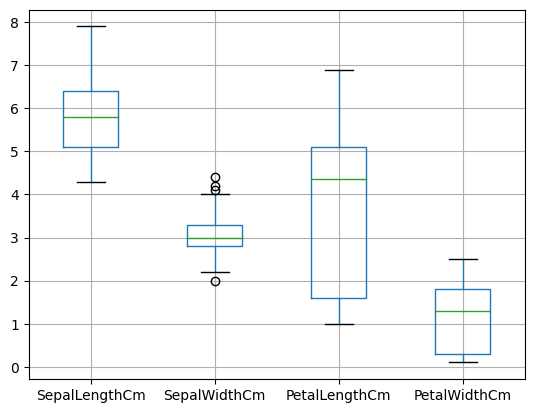

In [3]:

new_data=data.drop(['Id'],axis=1)
new_data.boxplot()

In [16]:
# create arrays
df_numeric = data.select_dtypes(include=np.number)
X = df_numeric.values
# instantiate model
nbrs = NearestNeighbors(n_neighbors = 3)

# fit model
nbrs.fit(X)
distances, indices = nbrs.kneighbors(X)

print(distances[:10])
print(indices[:10])

[[0.         1.13578167 2.06397674]
 [0.         1.04403065 1.13578167]
 [0.         1.02956301 1.04403065]
 [0.         1.02956301 1.19163753]
 [0.         1.17473401 1.19163753]
 [0.         1.17473401 1.4106736 ]
 [0.         1.08627805 1.4106736 ]
 [0.         1.08627805 1.27279221]
 [0.         1.14455231 1.27279221]
 [0.         1.14455231 1.27279221]]
[[ 0  1  2]
 [ 1  2  0]
 [ 2  3  1]
 [ 3  2  4]
 [ 4  5  3]
 [ 5  4  6]
 [ 6  7  5]
 [ 7  6  8]
 [ 8  9  7]
 [ 9  8 10]]


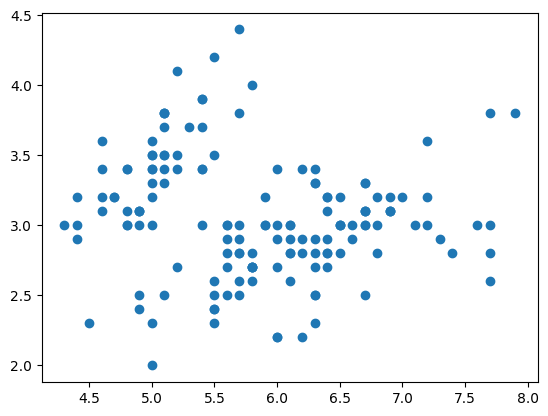

In [ ]:
# input data
df = data[["SepalLengthCm", "SepalWidthCm"]]
# scatterplot of inputs data

plt.scatter(df["SepalLengthCm"], df["SepalWidthCm"])

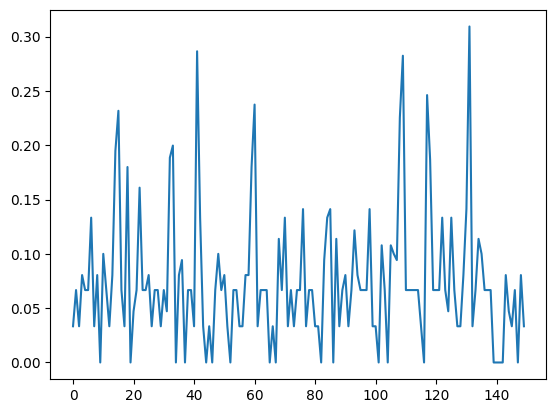

In [ ]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
# plot mean of k-distances of each observation

plt.plot(distances.mean(axis =1))

In [17]:
# visually determine cutoff values > 0.15
outlier_index = np.where(distances.mean(axis = 1) > 0.15)
outlier_index

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149]),)

In [ ]:
# filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

,SepalLengthCm,SepalWidthCm
14,5.8,4.0
15,5.7,4.4
18,5.7,3.8
22,4.6,3.6
32,5.2,4.1
33,5.5,4.2
41,4.5,2.3
59,5.2,2.7
60,5.0,2.0
108,6.7,2.5


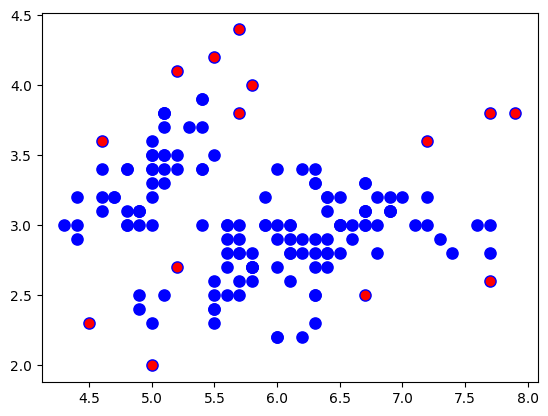

In [ ]:
# plot data
plt.scatter(df["SepalLengthCm"], df["SepalWidthCm"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["SepalLengthCm"], outlier_values["SepalWidthCm"], color = "r")

In [18]:
# data wrangling
import pandas as pd
# visualization
import matplotlib.pyplot as plt
# algorithm
from sklearn.cluster import DBSCAN

In [19]:
# input data
df = data[["SepalLengthCm", "SepalWidthCm"]]
# specify & fit model
model = DBSCAN(eps = 0.4, min_samples = 10).fit(df)

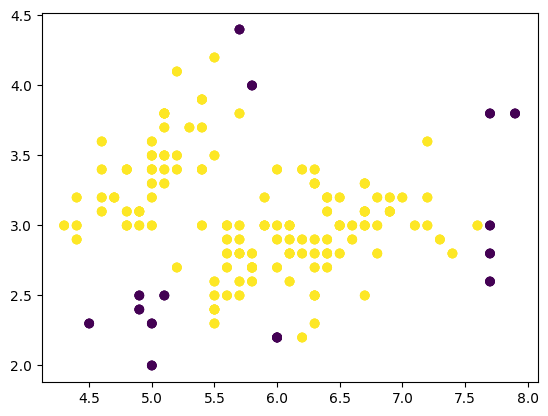

In [23]:
# visualize outputs
colors = model.labels_
plt.scatter(df["SepalLengthCm"], df["SepalWidthCm"], c = colors)
plt.show()

In [21]:
# outliers dataframe
outliers = df[model.labels_ == -1]
print(outliers)

     SepalLengthCm  SepalWidthCm
14             5.8           4.0
15             5.7           4.4
41             4.5           2.3
57             4.9           2.4
60             5.0           2.0
62             6.0           2.2
93             5.0           2.3
98             5.1           2.5
106            4.9           2.5
117            7.7           3.8
118            7.7           2.6
119            6.0           2.2
122            7.7           2.8
131            7.9           3.8
135            7.7           3.0
